In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [3]:
def prepare_image(file):
    img_path = 'C:/Users/Rasula/Documents/Projects/deepLizardModel/data/train/yes/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

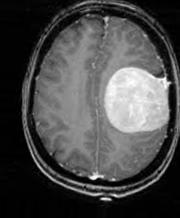

In [4]:
from IPython.display import Image
Image(filename='C:/Users/Rasula/Documents/Projects/deepLizardModel/data/train/yes/aug_Y1_0_1137.jpg', width=300,height=200)

In [5]:
preprocessed_image = prepare_image('aug_Y1_0_1137.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 2us/step


[[('n03920288', 'Petri_dish', 0.4753451),
  ('n03447721', 'gong', 0.37986866),
  ('n04286575', 'spotlight', 0.08682423),
  ('n03017168', 'chime', 0.041622944),
  ('n02865351', 'bolo_tie', 0.003264722)]]

In [6]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

In [7]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [8]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [9]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [18]:
x = mobile.layers[-6].output
output = Dense(units=2, activation='softmax')(x)

In [19]:
model = Model(inputs=mobile.input, outputs=output)

In [20]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [22]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
200/200 - 41s - loss: 0.1377 - accuracy: 0.9475 - val_loss: 0.6729 - val_accuracy: 0.7800
Epoch 2/30
200/200 - 40s - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.8044 - val_accuracy: 0.8000
Epoch 3/30
200/200 - 42s - loss: 0.0192 - accuracy: 0.9960 - val_loss: 0.9980 - val_accuracy: 0.8100
Epoch 4/30
200/200 - 49s - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.9820 - val_accuracy: 0.7950
Epoch 5/30
200/200 - 42s - loss: 0.0097 - accuracy: 0.9970 - val_loss: 1.2271 - val_accuracy: 0.7850
Epoch 6/30
200/200 - 42s - loss: 0.0099 - accuracy: 0.9960 - val_loss: 1.7118 - val_accuracy: 0.7850
Epoch 7/30
200/200 - 42s - loss: 0.0128 - accuracy: 0.9950 - val_loss: 1.2917 - val_accuracy: 0.8300
Epoch 8/30
200/200 - 42s - loss: 0.0097 - accuracy: 0.9960 - val_loss: 1.2933 - val_accuracy: 0.7900
Epoch 9/30
200/200 - 42s - loss: 0.0055 - accuracy: 0.9975 - val_loss: 1.2637 - val_accuracy: 0.8100
Epoch 10/30
200/200 - 42s - loss: 0.0121 - accuracy: 0.9960 - val_loss: 1.4288 - val_accura

In [24]:
test_labels = test_batches.classes

In [25]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [27]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [28]:
test_batches.class_indices

{'no': 0, 'yes': 1}

Confusion matrix, without normalization
[[20 30]
 [ 0 50]]


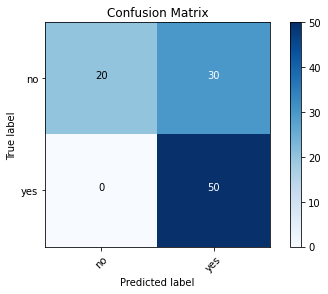

In [29]:
cm_plot_labels = ['no','yes']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')